In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('monthly-sunspots.csv')

data.head()


Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

sunspots = data['Sunspots'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_sunspots = scaler.fit_transform(sunspots)

train_size = int(len(normalized_sunspots) * 0.8)
train, test = normalized_sunspots[0:train_size, :], normalized_sunspots[train_size:len(normalized_sunspots), :]

train.shape, test.shape


((2256, 1), (564, 1))

In [4]:
def create_dataset(dataset, look_back=1):

    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX.shape, trainY.shape, testX.shape, testY.shape

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX.shape, trainY.shape, testX.shape, testY.shape

((2253, 3), (2253,), (561, 3), (561,))

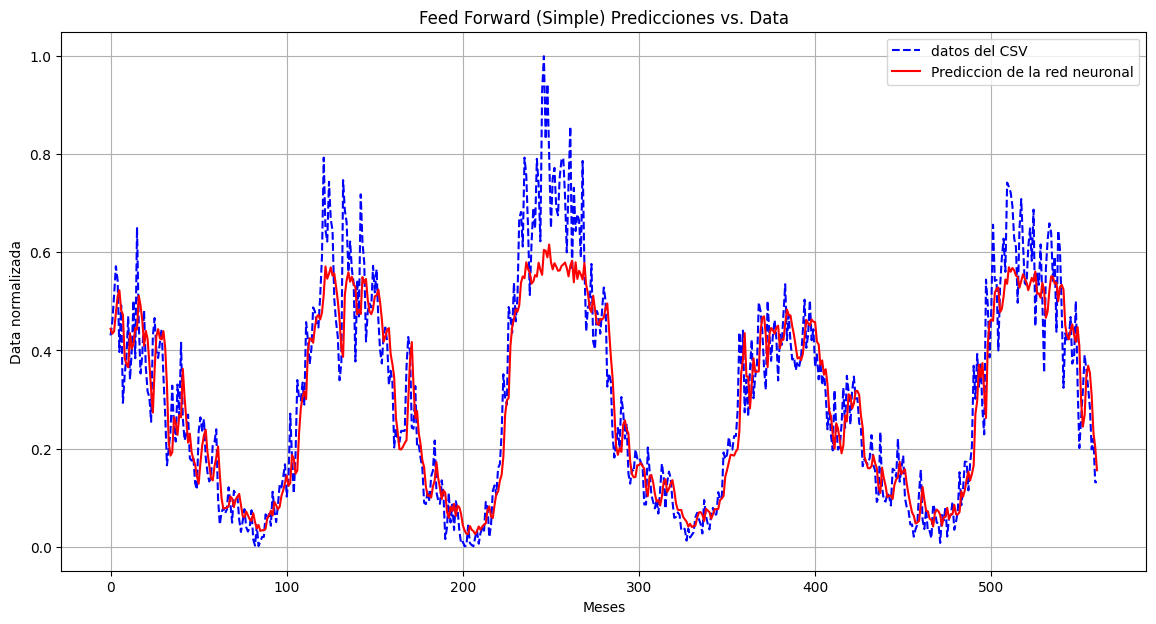

In [19]:
from sklearn.neural_network import MLPRegressor

model_simple_nn = MLPRegressor(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', max_iter=500, random_state=0)

model_simple_nn.fit(trainX, trainY.ravel())

train_loss_simple_nn = model_simple_nn.loss_curve_

val_loss_simple_nn = model_simple_nn.loss_

train_loss_simple_nn[-1], val_loss_simple_nn

trainX_flattened = trainX.reshape(-1, look_back)
testX_flattened = testX.reshape(-1, look_back)

predictions_simple_nn = model_simple_nn.predict(testX_flattened)

plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSV", color='blue', linestyle='dashed')
plt.plot(predictions_simple_nn, label="Prediccion de la red neuronal", color='red', linestyle='solid')
plt.title("Feed Forward (Simple) Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("Data normalizada")
plt.legend()
plt.grid(True)
plt.show()





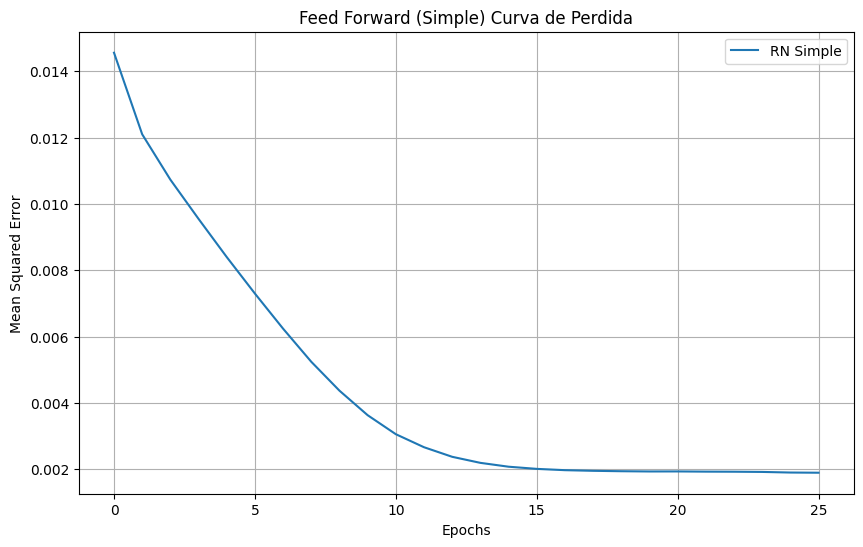

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(model_simple_nn.loss_curve_, label="RN Simple")
plt.title("Feed Forward (Simple) Curva de Perdida")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
trainX_flattened = trainX.reshape(-1, look_back)
testX_flattened = testX.reshape(-1, look_back)

model_pseudo_rnn = MLPRegressor(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', max_iter=500, random_state=0)
model_pseudo_rnn.fit(trainX_flattened, trainY)

train_score_pseudo_rnn = model_pseudo_rnn.score(trainX_flattened, trainY)
val_score_pseudo_rnn = model_pseudo_rnn.score(testX_flattened, testY)

train_score_pseudo_rnn, val_score_pseudo_rnn



(0.8250620138454584, 0.8460492691128105)

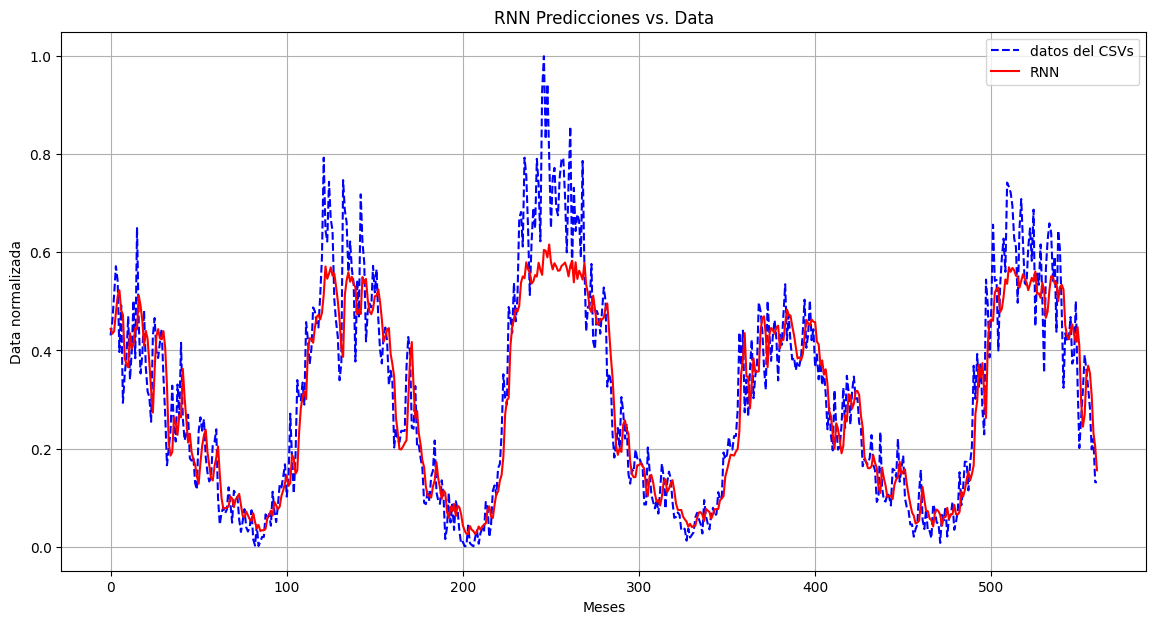

In [25]:
predictions_pseudo_rnn = model_pseudo_rnn.predict(testX_flattened)
plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSVs", color='blue', linestyle='dashed')
plt.plot(predictions_pseudo_rnn, label="RNN", color='red')
plt.title("RNN Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("Data normalizada")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
model_pseudo_lstm = MLPRegressor(hidden_layer_sizes=(16, 16, 8), activation='relu', solver='adam', max_iter=500, random_state=0)
model_pseudo_lstm.fit(trainX_flattened, trainY)

train_score_pseudo_lstm = model_pseudo_lstm.score(trainX_flattened, trainY)
val_score_pseudo_lstm = model_pseudo_lstm.score(testX_flattened, testY)

train_score_pseudo_lstm, val_score_pseudo_lstm


(0.7837961725854736, 0.8404013712125384)

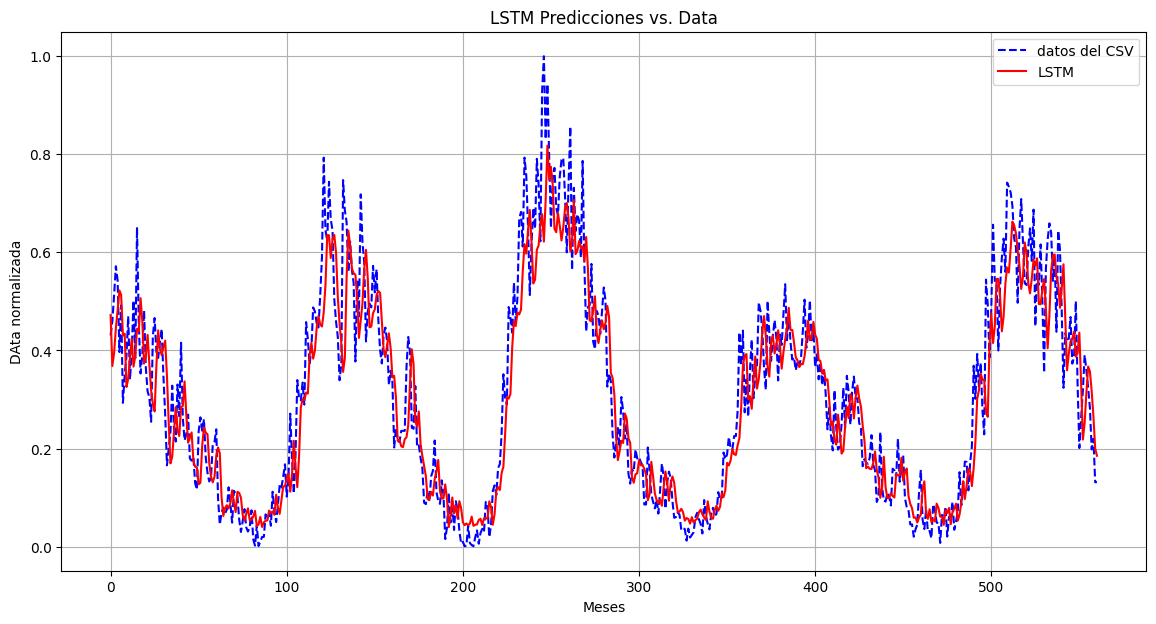

In [26]:
predictions_pseudo_lstm = model_pseudo_lstm.predict(testX_flattened)
plt.figure(figsize=(14, 7))
plt.plot(testY, label="datos del CSV", color='blue', linestyle='dashed')
plt.plot(predictions_pseudo_lstm, label="LSTM", color='red')
plt.title("LSTM Predicciones vs. Data")
plt.xlabel("Meses")
plt.ylabel("DAta normalizada")
plt.legend()
plt.grid(True)
plt.show()

En general, el trabajar con las arquitecturas tiene sus diferentes ventajas con respecto a trabajar con alguna otra diferente. 
Algunas de estas ventajas para cada una son: 

- Red simple: Es la más simple de las tres arquitecturas, por consiguiente es la más sencilla de implementar y entrenar, tambien es una de las más rapidas para correr, así como tambien ser bastante flexible y escalable. Sin embargo, estas tambien tiene la desventaja que no tiene memoria, lo cual hace que no puedan recordas inputs previos, y es muy facil que ocurra overfitting, ya 
que si no se regulariza bien es casi 100% seguro que ocurra overfitting. 

- RNN: Es una arquitectura que, a diferencia de la red simple, si tiene memoria, lo cual permite que se puedan recordar estados o inputs anteriores, así como tambien compartir pesos para los parametros y reduciendo así los datos con los que se trabaja. Sin embargo, una desventaja clave es que este tipo de red es bastante dificil de entrenar, aunque nos de mejores resultados. Estas tambien son bastante suceptibles a un problema de gradiente que desaparece.  

- LSTM: Estas redes están diseñadas para recordar patrones a lo largo de largas secuencias y son menos susceptibles al problema del gradiente que desaparece en comparación con las RNN básicas. Los mecanismos de compuerta, como las compuertas de entrada, olvido y salida, permiten a las LSTM regular el flujo de información, haciéndolas más flexibles y capaces. Debido a estas características, las LSTM se han convertido en el estándar para muchas tareas secuenciales, desde la predicción de series temporales hasta el procesamiento del lenguaje natural.

En resumen, la elección de la arquitectura de la red neuronal debe ser guiada por la naturaleza específica del problema a tratar. Para datos de series temporales o secuenciales, las RNN o las LSTM suelen ser más adecuadas. Para datos no secuenciales, una red neuronal de propagación hacia adelante podría ser suficiente. También vale la pena explorar arquitecturas más recientes como las GRU (Unidades Recurrentes con Compuertas) o los modelos Transformer para tareas específicas.